Source: https://medium.com/@cdabakoglu/time-series-forecasting-arima-lstm-prophet-with-python-e73a750a9887  

In [1]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('monthly-beer-production-in-austr.csv')

df.head()

,Month,Monthly beer production
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    476 non-null    object 
 1   Monthly beer production  476 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.6+ KB


In [3]:
df.Month = pd.to_datetime(df.Month)
df = df.set_index("Month")
df.head()

,Monthly beer production
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


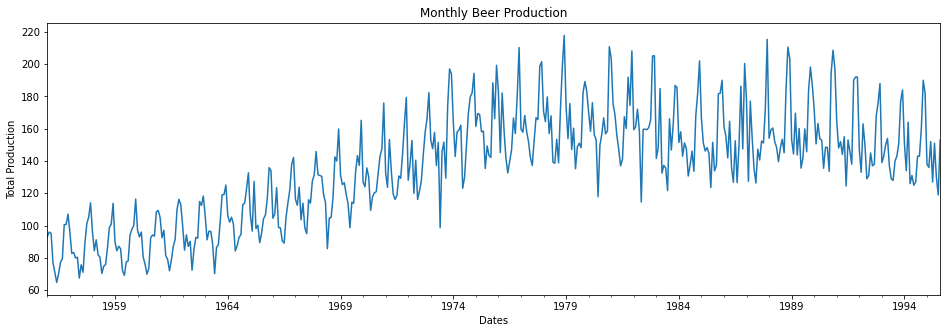

In [4]:
df.index.freq = 'MS'

ax = df['Monthly beer production'].plot(figsize = (16,5), title = "Monthly Beer Production")
ax.set(xlabel='Dates', ylabel='Total Production');

When we look at plot we can sey there is a seasonality in data. That’s why we will use SARIMA (Seasonal ARIMA) instead of ARIMA.

    Seasonal ARIMA, is an extension of ARIMA that explicitly supports univariate time series data with a seasonal component. It adds three new hyperparameters to specify the autoregression (AR), differencing (I) and moving average (MA) for the seasonal component of the series, as well as an additional parameter for the period of the seasonality.

    There are four seasonal elements that are not part of ARIMA that must be configured; they are:
    P: Seasonal autoregressive order.
    D: Seasonal difference order.
    Q: Seasonal moving average order.
    m: The number of time steps for a single seasonal period.

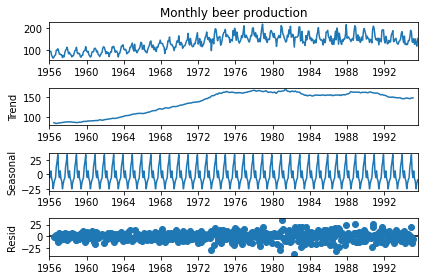

In [5]:
a = seasonal_decompose(df["Monthly beer production"], model = "add")
a.plot();

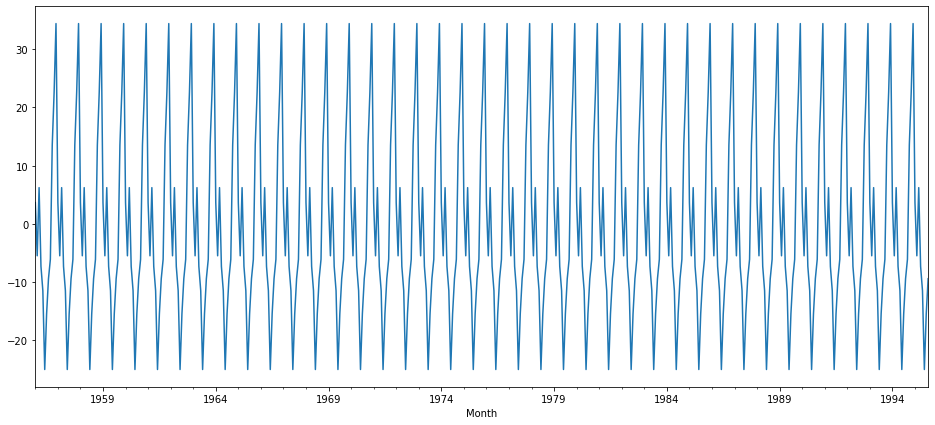

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 7))
a.seasonal.plot();

In [9]:
auto_arima(df['Monthly beer production'], seasonal=True, m=12, 
           max_p=7, max_d=5,max_q=7, max_P=4, max_D=4,max_Q=4).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  476
Model:             SARIMAX(2, 1, 3)x(3, 0, [1], 12)   Log Likelihood               -1736.459
Date:                              Fri, 05 Nov 2021   AIC                           3492.918
Time:                                      14:22:13   BIC                           3534.551
Sample:                                           0   HQIC                          3509.290
                                              - 476                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1523      0.004   -286.982      0.000      -1.160      -1.144
ar.L2         -0.9956      0.005   -215.484      0.000      -1.005      -0.987
ma.L1          0.2413      0.026      9.252      0.000       0.190       0.292
ma.L2         -0.0089      0.026     -0.347      0.729      -0.059       0.041
ma.L3         -0.8601      0.024    -36.553      0.000      -0.906      -0.814
ar.S.L12       1.0078      0.073     13.819      0.000       0.865       1.151
ar.S.L24       0.0021      0.054      0.038      0.970      -0.104       0.109
ar.S.L36      -0.0147      0.059     -0.251      0.802      -0.130       0.100
ma.S.L12      -0.8299      0.058    -14.373      0.000      -0.943      -0.717
sigma2        82.1924      4.531     18.142      0.000      73.313      91.072
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                34.76
Prob(Q):                              0.67   Prob(JB):                         0.00
Heteroskedasticity (H):               3.26   Skew:                            -0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

As we can see best arima model chosen by auto_arima() is SARIMAX(2, 1, 1)x(4, 0, 3, 12)

Let’s split the data into train and test set

In [11]:
train_data = df[:len(df)-12]
test_data = df[len(df)-12:]

arima_model = SARIMAX(train_data['Monthly beer production'], order = (2,1,1), seasonal_order = (4,0,3,12))

arima_result = arima_model.fit()
arima_result.summary()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =           11     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.11947D+00    |proj g|=  1.61673D-01


 This problem is unconstrained.



At iterate    5    f=  4.02339D+00    |proj g|=  4.51168D-02

At iterate   10    f=  3.79643D+00    |proj g|=  5.25852D-02

At iterate   15    f=  3.75369D+00    |proj g|=  5.37576D-02

At iterate   20    f=  3.71375D+00    |proj g|=  1.15039D-02

At iterate   25    f=  3.71141D+00    |proj g|=  1.71312D-02

At iterate   30    f=  3.70346D+00    |proj g|=  8.23028D-02

At iterate   35    f=  3.68487D+00    |proj g|=  1.64241D-02

At iterate   40    f=  3.68143D+00    |proj g|=  1.52081D-02

At iterate   45    f=  3.68093D+00    |proj g|=  5.00184D-03

At iterate   50    f=  3.68062D+00    |proj g|=  2.37281D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

<class 'statsmodels.iolib.summary.Summary'>
"""
                                         SARIMAX Results                                          
==================================================================================================
Dep. Variable:                    Monthly beer production   No. Observations:                  464
Model:             SARIMAX(2, 1, 1)x(4, 0, [1, 2, 3], 12)   Log Likelihood               -1707.806
Date:                                    Fri, 05 Nov 2021   AIC                           3437.612
Time:                                            14:33:17   BIC                           3483.127
Sample:                                        01-01-1956   HQIC                          3455.530
                                             - 08-01-1994                                         
Covariance Type:                                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1256      0.042     -3.017      0.003      -0.207      -0.044
ar.L2         -0.1743      0.046     -3.751      0.000      -0.265      -0.083
ma.L1         -0.8413      0.028    -29.733      0.000      -0.897      -0.786
ar.S.L12       1.7562      0.109     16.053      0.000       1.542       1.971
ar.S.L24      -1.6161      0.208     -7.774      0.000      -2.024      -1.209
ar.S.L36       0.7917      0.163      4.862      0.000       0.473       1.111
ar.S.L48       0.0671      0.060      1.116      0.264      -0.051       0.185
ma.S.L12      -1.5588      0.121    -12.861      0.000      -1.796      -1.321
ma.S.L24       1.4046      0.198      7.083      0.000       1.016       1.793
ma.S.L36      -0.6679      0.115     -5.826      0.000      -0.893      -0.443
sigma2        84.0665      4.888     17.199      0.000      74.487      93.646
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                41.17
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               4.07   Skew:                            -0.29
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
arima_pred = arima_result.predict(start = len(train_data), end = len(df)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

1994-09-01    133.848438
1994-10-01    157.716202
1994-11-01    182.089950
1994-12-01    183.561191
1995-01-01    144.576240
1995-02-01    136.789032
1995-03-01    151.099785
1995-04-01    133.119986
1995-05-01    138.021721
1995-06-01    120.477738
1995-07-01    128.296273
1995-08-01    138.810833
Freq: MS, Name: ARIMA Predictions, dtype: float64

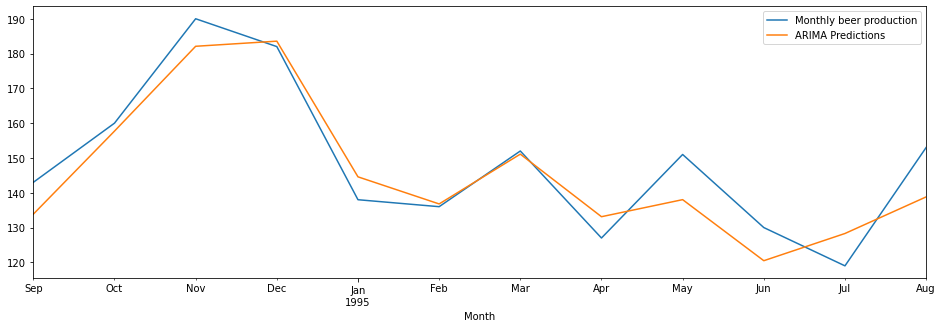

In [13]:
test_data['Monthly beer production'].plot(figsize = (16,5), legend=True)

arima_pred.plot(legend = True);

In [14]:
arima_rmse_error = rmse(test_data['Monthly beer production'], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 65.24745956068035
RMSE Error: 8.07758995992495
Mean: 136.3953781512605


In [15]:
test_data['ARIMA_Predictions'] = arima_pred

LSTM

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train_data)
scaled_train_data = scaler.transform(train_data)
scaled_test_data = scaler.transform(test_data)

In [19]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 12
n_features= 1
generator = TimeseriesGenerator(scaled_train_data, scaled_train_data, length=n_input, batch_size=1)

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

lstm_model = Sequential()
lstm_model.add(LSTM(200, activation='relu', input_shape=(n_input, n_features)))
lstm_model.add(Dense(1))
lstm_model.compile(optimizer='adam', loss='mse')

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 200)               161600    
_________________________________________________________________
dense (Dense)                (None, 1)                 201       
Total params: 161,801
Trainable params: 161,801
Non-trainable params: 0
_________________________________________________________________


2021-11-05 14:34:22.976974: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [20]:
lstm_model.fit_generator(generator,epochs=20)

Epoch 1/20


2021-11-05 14:34:23.190082: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


452/452 [==============================] - 3s 5ms/step - loss: 0.0206
Epoch 2/20
452/452 [==============================] - 2s 5ms/step - loss: 0.0123
Epoch 3/20
452/452 [==============================] - 2s 5ms/step - loss: 0.0099
Epoch 4/20
452/452 [==============================] - 2s 5ms/step - loss: 0.0084
Epoch 5/20
452/452 [==============================] - 2s 5ms/step - loss: 0.0079
Epoch 6/20
452/452 [==============================] - 2s 5ms/step - loss: 0.0085
Epoch 7/20
452/452 [==============================] - 2s 5ms/step - loss: 0.0085
Epoch 8/20
452/452 [==============================] - 2s 5ms/step - loss: 0.0073
Epoch 9/20
452/452 [==============================] - 2s 5ms/step - loss: 0.0067
Epoch 10/20
452/452 [==============================] - 2s 5ms/step - loss: 0.0068
Epoch 11/20
452/452 [==============================] - 2s 5ms/step - loss: 0.0069
Epoch 12/20
452/452 [==============================] - 2s 5ms/step - loss: 0.0070
Epoch 13/20
452/452 [===============

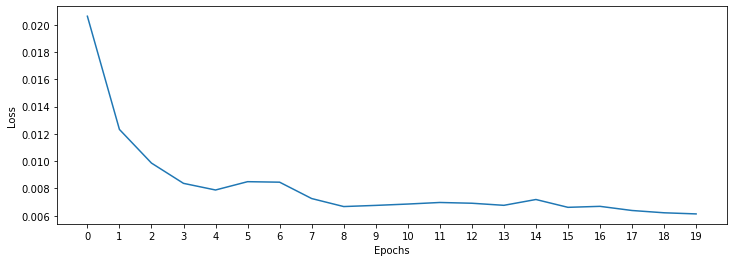

In [21]:
losses_lstm = lstm_model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [22]:
lstm_predictions_scaled = list()

batch = scaled_train_data[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):   
    lstm_pred = lstm_model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [23]:
lstm_predictions_scaled

[array([0.5368818], dtype=float32),
 array([0.6141308], dtype=float32),
 array([0.71458083], dtype=float32),
 array([0.7249996], dtype=float32),
 array([0.57663053], dtype=float32),
 array([0.5352387], dtype=float32),
 array([0.60380644], dtype=float32),
 array([0.46167785], dtype=float32),
 array([0.46062326], dtype=float32),
 array([0.43842155], dtype=float32),
 array([0.4591617], dtype=float32),
 array([0.5201581], dtype=float32)]

In [24]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)
lstm_predictions

array([[146.94291608],
       [158.76201164],
       [174.13086759],
       [175.72493981],
       [153.02447151],
       [146.69151853],
       [157.18238472],
       [135.43671094],
       [135.27535944],
       [131.87849675],
       [135.05173992],
       [144.38419114]])

In [25]:
test_data['LSTM_Predictions'] = lstm_predictions
test_data

,Monthly beer production,ARIMA_Predictions,LSTM_Predictions
Month,,,
1994-09-01,143.0,133.848438,146.942916
1994-10-01,160.0,157.716202,158.762012
1994-11-01,190.0,182.089950,174.130868
1994-12-01,182.0,183.561191,175.724940
1995-01-01,138.0,144.576240,153.024472
1995-02-01,136.0,136.789032,146.691519
1995-03-01,152.0,151.099785,157.182385
1995-04-01,127.0,133.119986,135.436711
1995-05-01,151.0,138.021721,135.275359


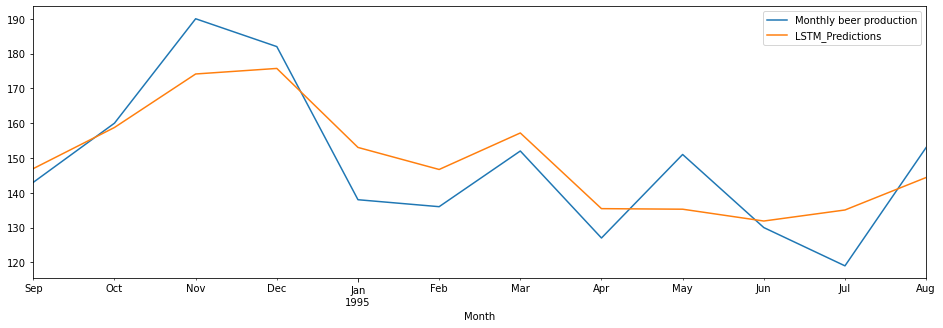

In [26]:
test_data['Monthly beer production'].plot(figsize = (16,5), legend=True)

test_data['LSTM_Predictions'].plot(legend = True);

In [27]:
lstm_rmse_error = rmse(test_data['Monthly beer production'], test_data["LSTM_Predictions"])
lstm_mse_error = lstm_rmse_error**2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {lstm_mse_error}\nRMSE Error: {lstm_rmse_error}\nMean: {mean_value}')

MSE Error: 110.75392077859983
RMSE Error: 10.523968870088881
Mean: 136.3953781512605


# Prophet 

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 476 entries, 1956-01-01 to 1995-08-01
Freq: MS
Data columns (total 1 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Monthly beer production  476 non-null    float64
dtypes: float64(1)
memory usage: 7.4 KB


In [32]:
df_pr = df.copy()
df_pr = df.reset_index()

df_pr.columns = ['ds','y'] # To use prophet column names should be like that

train_data_pr = df_pr.iloc[:len(df)-12]
test_data_pr = df_pr.iloc[len(df)-12:]

from fbprophet import Prophet

m = Prophet()


m.fit(train_data_pr)
future = m.make_future_dataframe(periods=12,freq='MS')
prophet_pred = m.predict(future)

prophet_pred.tail()

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Initial log joint probability = -6.79574
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1177.95   0.000515742       77.4488      0.2975           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     195       1179.94    0.00036421       70.6607   4.755e-06       0.001      298  LS failed, Hessian reset 
     199       1179.95   3.87355e-05       60.3736      0.7451      0.7451      302   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     274       1179.99   1.08397e-06       65.4461   1.807e-08       0.001      449  LS failed, Hessian reset 
     285       1179.99   2.62616e-08       57.1928      0.2713           1      463   
Optimization terminated normally: 
  Convergence detected: relative gradient magnitude is below tolerance


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
471,1995-04-01,151.165860,130.923652,155.363812,151.089358,151.210091,-7.984091,-7.984091,-7.984091,-7.984091,-7.984091,-7.984091,0.0,0.0,0.0,143.181770
472,1995-05-01,151.102913,126.561249,152.428418,151.000077,151.173449,-11.386819,-11.386819,-11.386819,-11.386819,-11.386819,-11.386819,0.0,0.0,0.0,139.716094
473,1995-06-01,151.037867,114.740484,140.216966,150.909375,151.139311,-23.869618,-23.869618,-23.869618,-23.869618,-23.869618,-23.869618,0.0,0.0,0.0,127.168249
474,1995-07-01,150.974920,123.410471,146.926138,150.814750,151.094400,-15.751071,-15.751071,-15.751071,-15.751071,-15.751071,-15.751071,0.0,0.0,0.0,135.223849
475,1995-08-01,150.909874,129.714835,153.670954,150.712368,151.053850,-9.190193,-9.190193,-9.190193,-9.190193,-9.190193,-9.190193,0.0,0.0,0.0,141.719682


In [33]:
prophet_pred = pd.DataFrame({"Date" : prophet_pred[-12:]['ds'], "Pred" : prophet_pred[-12:]["yhat"]})
prophet_pred = prophet_pred.set_index("Date")
prophet_pred.index.freq = "MS"
prophet_pred

,Pred
Date,
1994-09-01,145.089218
1994-10-01,166.162072
1994-11-01,173.752204
1994-12-01,186.006822
1995-01-01,155.276243
1995-02-01,146.861337
1995-03-01,158.996224
1995-04-01,143.181770
1995-05-01,139.716094


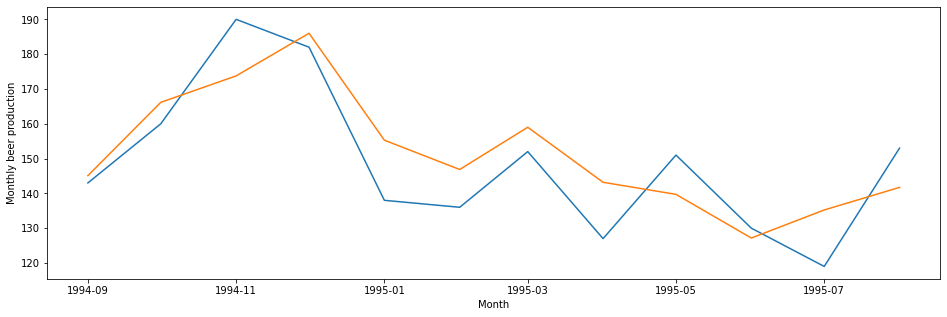

In [34]:
test_data["Prophet_Predictions"] = prophet_pred['Pred'].values

import seaborn as sns

plt.figure(figsize=(16,5))
ax = sns.lineplot(x= test_data.index, y=test_data["Monthly beer production"])
sns.lineplot(x=test_data.index, y = test_data["Prophet_Predictions"]);

In [35]:
prophet_rmse_error = rmse(test_data['Monthly beer production'], test_data["Prophet_Predictions"])
prophet_mse_error = prophet_rmse_error ** 2
mean_value = df['Monthly beer production'].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 131.2849757479636
RMSE Error: 11.457965602495218
Mean: 136.3953781512605


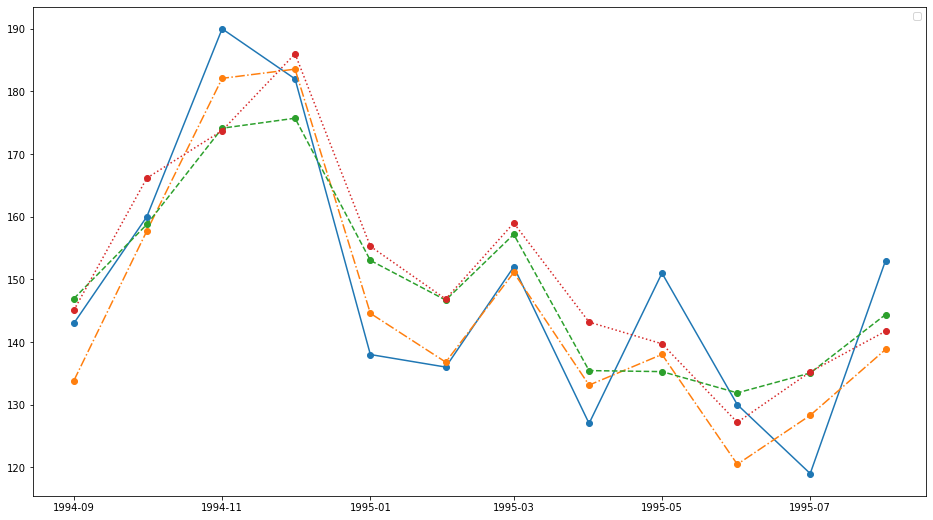

In [37]:
rmse_errors = [arima_rmse_error, lstm_rmse_error, prophet_rmse_error]
mse_errors = [arima_mse_error, lstm_mse_error, prophet_mse_error]
errors = pd.DataFrame({"Models" : ["ARIMA", "LSTM", "Prophet"],"RMSE Errors" : rmse_errors, "MSE Errors" : mse_errors})
plt.figure(figsize=(16,9))
plt.plot_date(test_data.index, test_data["Monthly beer production"], linestyle="-")
plt.plot_date(test_data.index, test_data["ARIMA_Predictions"], linestyle="-.")
plt.plot_date(test_data.index, test_data["LSTM_Predictions"], linestyle="--")
plt.plot_date(test_data.index, test_data["Prophet_Predictions"], linestyle=":")
plt.legend()
plt.show()

In [38]:
print(f"Mean: {test_data['Monthly beer production'].mean()}")

errors

Mean: 148.41666666666666


,Models,RMSE Errors,MSE Errors
0,ARIMA,8.077590,65.247460
1,LSTM,10.523969,110.753921
2,Prophet,11.457966,131.284976


In [ ]:
test_data